In [ ]:
#import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns


In [ ]:
#Loading the dataset
data=pd.read_excel("C:/Users/HP/Downloads/DATA 1_ Raisin_Dataset.xlsx")
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,Kecimen
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,Kecimen
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,Kecimen
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,Kecimen
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248.0,430.077308,247.838695,0.817263,85839.0,0.668793,1129.072,Besni
896,87350.0,440.735698,259.293149,0.808629,90899.0,0.636476,1214.252,Besni
897,99657.0,431.706981,298.837323,0.721684,106264.0,0.741099,1292.828,Besni
898,93523.0,476.344094,254.176054,0.845739,97653.0,0.658798,1258.548,Besni


## Exploratory Data Analysis

In [ ]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [ ]:
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

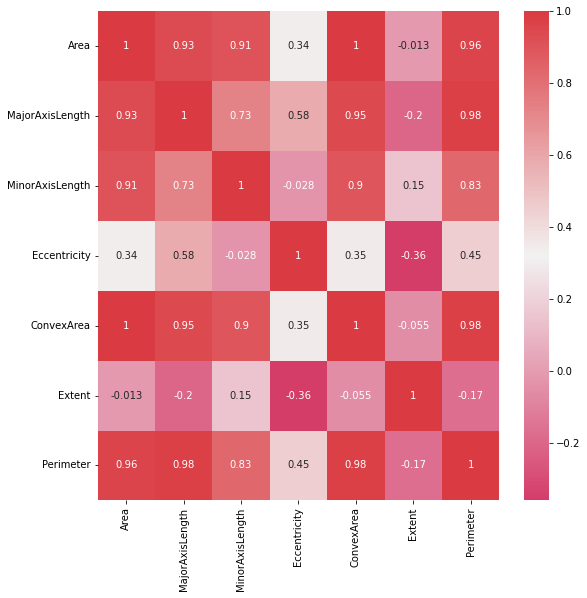

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(),cmap=sns.diverging_palette(000,11,as_cmap=True),annot=True)
plt.show()


In [ ]:
#Interpretation:
#Here we acn see that there is strong correlation between Major Axis and Convex Area ,Minor Axis and Convex Area,
#Area and Minor Axix area.Also perimeter and area have strong correlation.

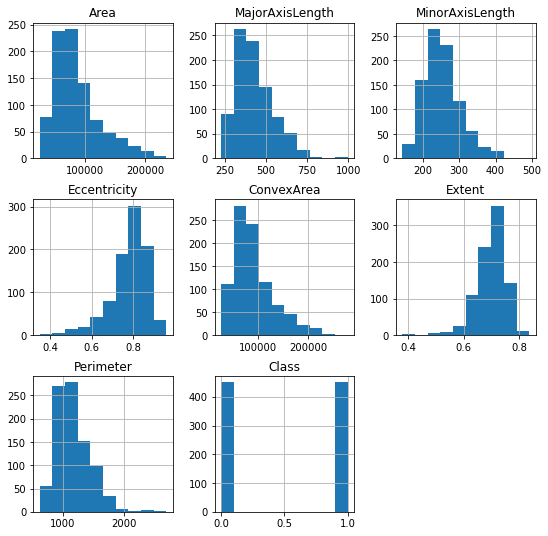

In [ ]:
data.hist(figsize=(9,9))
plt.show()

In [ ]:
#Interpretation:
#Here we can see the distribution plots for the variables.The variable Eccentricity is left-skewd and Convex Area is right Skewed
#Extent is left skewed and Perimeter is right skewewd.

<AxesSubplot:xlabel='MinorAxisLength', ylabel='Class'>

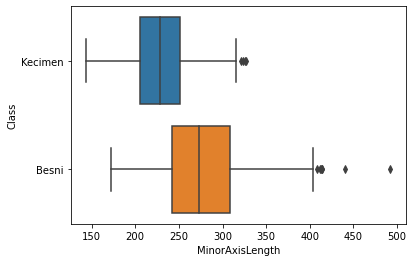

In [ ]:
#Let us plot a boxplot to see relationship between Class and MinorAxislength
sns.boxplot(y=data['Class'],x=data['MinorAxisLength'])

<AxesSubplot:xlabel='MajorAxisLength', ylabel='Class'>

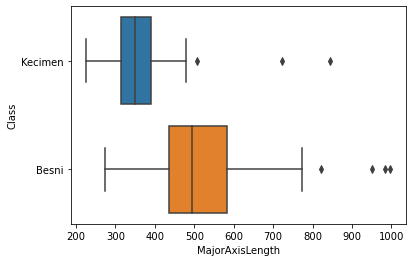

In [ ]:
#Let us plot a boxplot to see relationship between Class and MajorAxislength
sns.boxplot(y=data['Class'],x=data['MajorAxisLength'])

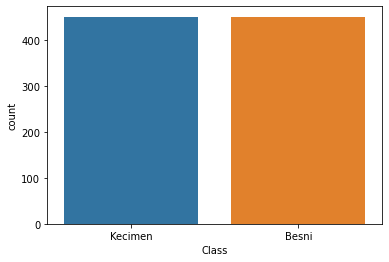

In [ ]:
#We with the help of countplot see whether there is any imbalance.
sns.countplot(x='Class',data=data)
plt.show()

In [ ]:
#Interpretation:
 #So we can see that our both the classes are balanced.hence we need not go for balancing data as there is no minority class.

In [ ]:
#We perform label encoding to convert target variable Class which is categorical to numeric.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Class']= label_encoder.fit_transform(data['Class'])
data['Class'].unique()


array([1, 0])

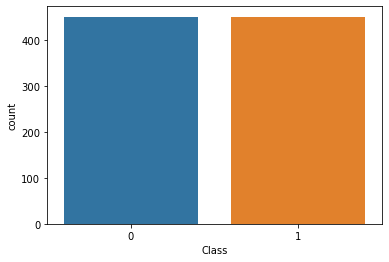

In [ ]:
sns.countplot(x='Class',data=data)
plt.show()

In [ ]:
y=data['Class'].copy()
X=data.drop(['Class'],axis=1)

In [ ]:
#WE train the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#We fit the Binary Logistic regression model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred


array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1])

In [ ]:
#Predicting and Calculating the accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[87, 10],
       [ 7, 76]], dtype=int64)

In [ ]:
#Interpretation:
#Here [87+76] is correct predictions and [7+10] is wrong prediction

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.09444444444444444

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6199229909328033

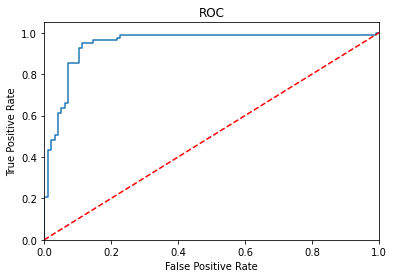

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [ ]:
#Interpretation:
#Here we can see that our curve is far from the red dotted line. This we can say that it is a good classifier.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        97
           1       0.88      0.92      0.90        83

    accuracy                           0.91       180
   macro avg       0.90      0.91      0.91       180
weighted avg       0.91      0.91      0.91       180



In [ ]:
#Interpretation:
#So here we can see that accuracy is very good.That being 91%